In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

img_path = "../resource/img/homework 3/test.png"

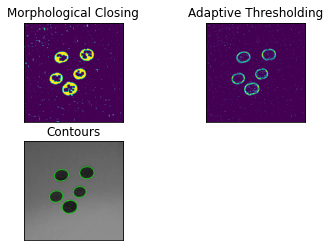

In [2]:
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 1)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 2)

titles = [
    "Morphological Closing",
    "Adaptive Thresholding",
    "Contours"
]
imgs = [closing, thresh, img]

for i, title in enumerate(titles):
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()